In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, accuracy_score, precision_score, \
        recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing
import duckdb

<Axes: xlabel='diff', ylabel='A_won'>

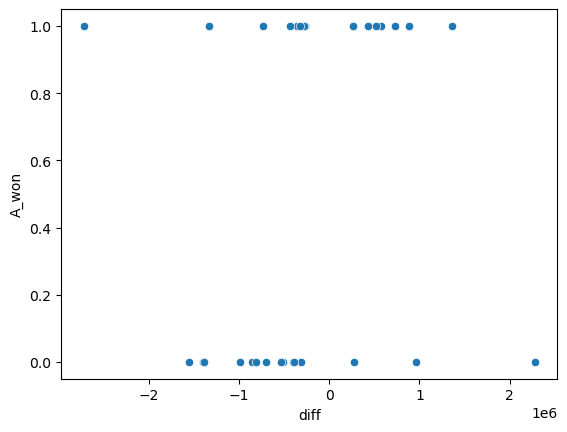

In [10]:
data = pd.read_csv('../campaign_csvs/people_visited_comparison.csv')

data = duckdb.sql("""SELECT *, visits_A - visits_B AS diff FROM data WHERE visits_A > 0 AND visits_B > 0
                  AND ABS(diff) > 250000""").df()

sns.scatterplot(data, x='diff',y='A_won')

In [11]:
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

In [12]:
model = LogisticRegression().fit(Normalizer(data['diff'].values.reshape(-1,1)), data['A_won'].values.reshape(-1,1))
# print(model.coef_)
# print(model.intercept_)

# print(model.predict_proba([[10]]))

c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='diff', ylabel='predictions'>

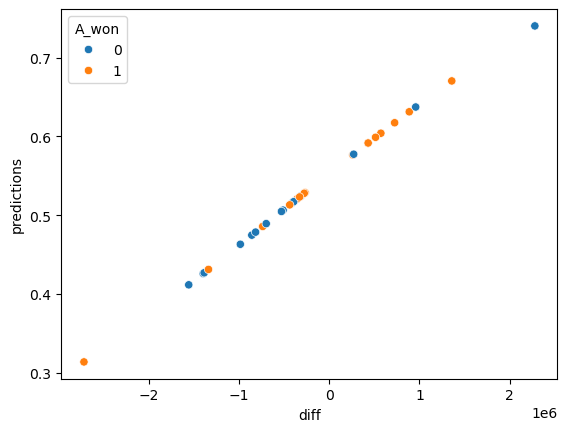

In [13]:
data['predictions'] = model.predict_proba(Normalizer(data['diff'].values.reshape(-1,1)))[:,1]
sns.scatterplot(data, x='diff',y='predictions', hue='A_won')

In [17]:

prediction_data = pd.read_csv('../campaign_csvs/election_prediction.csv')

print('2004:')
election_2004 = duckdb.sql("""SELECT state, evotes, Bush_2004, Kerry_2004, Bush_2004-Kerry_2004 AS diff_2004 FROM prediction_data
                           WHERE Bush_2004 > 0 AND Kerry_2004 > 0 AND NOT(state = 'District of Columbia')
                           AND NOT(state = 'New York')""").df()

election_2004['evotes_2004'] = election_2004['evotes']*model.predict_proba(Normalizer(election_2004['diff_2004'].values.reshape(-1,1)))[:,1]
bush_votes = np.sum(election_2004['evotes_2004'])
kerry_votes = np.sum(election_2004['evotes'])-np.sum(election_2004['evotes_2004'])
print(f'Bush: {bush_votes}')
print(f'Kerry: {kerry_votes}')

print('2008:')
election_2008 = duckdb.sql("""SELECT state, evotes, Obama_2008, Mccain_2008, Obama_2008-Mccain_2008 AS diff_2008 FROM prediction_data
                           WHERE Obama_2008 > 0 AND Mccain_2008 > 0""").df()

election_2008['evotes_2008'] = election_2008['evotes']*model.predict_proba(Normalizer(election_2008['diff_2008'].values.reshape(-1,1)))[:,1]
obama_votes = np.sum(election_2008['evotes_2008'])
mccain_votes = np.sum(election_2008['evotes'])-np.sum(election_2008['evotes_2008'])
print(f'Obama: {obama_votes}')
print(f'McCain: {mccain_votes}')

print('2012:')
election_2012 = duckdb.sql("""SELECT state, evotes, Obama_2012, Romney_2012, Obama_2012-Romney_2012 AS diff_2012 FROM prediction_data
                           WHERE Obama_2012 > 0 AND Romney_2012 > 0""").df()

election_2012['evotes_2012'] = election_2012['evotes']*model.predict_proba(Normalizer(election_2012['diff_2012'].values.reshape(-1,1)))[:,1]
obama_votes = np.sum(election_2012['evotes_2012'])
romney_votes = np.sum(election_2012['evotes'])-np.sum(election_2012['evotes_2012'])
print(f'Obama: {obama_votes}')
print(f'Romney: {romney_votes}')

print('2016:')
election_2016 = duckdb.sql("""SELECT state, evotes, Trump_2016, Clinton_2016, Trump_2016-Clinton_2016 AS diff_2016 FROM prediction_data
                           WHERE Trump_2016 > 0 AND Clinton_2016 > 0""").df()

election_2016['evotes_2016'] = election_2016['evotes']*model.predict_proba(Normalizer(election_2016['diff_2016'].values.reshape(-1,1)))[:,1]
trump_votes = np.sum(election_2016['evotes_2016'])
clinton_votes = np.sum(election_2016['evotes'])-np.sum(election_2016['evotes_2016'])
print(f'Trump: {trump_votes}')
print(f'Clinton: {clinton_votes}')

print('2020:')
election_2020 = duckdb.sql("""SELECT state, evotes, Trump_2020, Biden_2020, Biden_2020-Trump_2020 AS diff_2020 FROM prediction_data
                           WHERE Trump_2020 > 0 AND Biden_2020 > 0""").df()

election_2020['evotes_2020'] = election_2020['evotes']*model.predict_proba(Normalizer(election_2020['diff_2020'].values.reshape(-1,1)))[:,1]
biden_votes = np.sum(election_2020['evotes_2020'])
trump_votes = np.sum(election_2020['evotes'])-np.sum(election_2020['evotes_2020'])
print(f'Biden: {biden_votes}')
print(f'Trump: {trump_votes}')

print('2024:')
election_2024 = duckdb.sql("""SELECT state, evotes, Trump_2024, Harris_2024, Harris_2024-Trump_2024 AS diff_2024 FROM prediction_data
                           WHERE Trump_2024 > 0 AND Harris_2024 > 0""").df()

election_2024['evotes_2024'] = election_2024['evotes']*model.predict_proba(Normalizer(election_2024['diff_2024'].values.reshape(-1,1)))[:,1]
harris_votes = np.sum(election_2024['evotes_2024'])
trump_votes = np.sum(election_2024['evotes'])-np.sum(election_2024['evotes_2024'])
print(f'Harris: {harris_votes}')
print(f'Trump: {trump_votes}')

2004:
Bush: 92.18050111274017
Kerry: 83.81949888725983
2008:
Obama: 93.20489564819877
McCain: 81.79510435180123
2012:
Obama: 47.374593577185706
Romney: 47.625406422814294
2016:
Trump: 84.24554091034331
Clinton: 71.75445908965669
2020:
Biden: 83.96503337083489
Trump: 73.03496662916511
2024:
Harris: 48.714562376912
Trump: 44.285437623088


c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

    filter  accuracy  count
0        0      0.59     59
1    10000      0.57     56
2    20000      0.57     56
3    30000      0.58     55
4    40000      0.58     53
5    50000      0.61     51
6    60000      0.64     50
7    70000      0.63     49
8    80000      0.60     48
9    90000      0.59     46
10  100000      0.59     46
11  110000      0.59     44
12  120000      0.60     42
13  130000      0.68     40
14  140000      0.62     39
15  150000      0.62     39
16  160000      0.61     38
17  170000      0.67     36
18  180000      0.62     34
19  190000      0.70     33
20  200000      0.70     33
21  210000      0.70     33
22  220000      0.70     33
23  230000      0.70     33
24  240000      0.66     32
25  250000      0.66     32
26  260000      0.66     32
27  270000      0.66     29
28  280000      0.70     27
29  290000      0.70     27
30  300000      0.70     27
31  310000      0.70     27
32  320000      0.69     26
33  330000      0.72     25
34  340000      0.72

<Axes: xlabel='filter', ylabel='accuracy'>

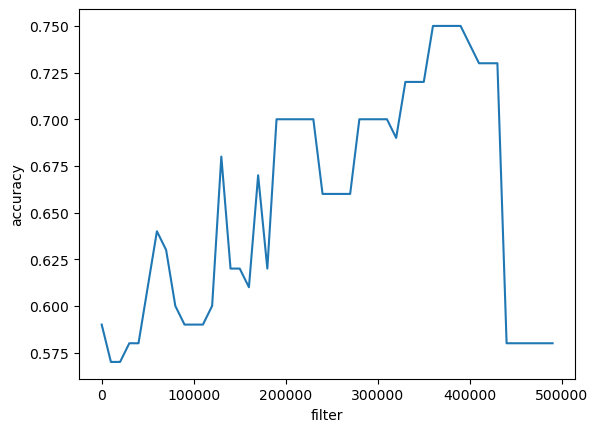

In [15]:
data_binary = pd.read_csv('../campaign_csvs/people_visited_comparison.csv')

data_binary = duckdb.sql("""SELECT *, visits_A - visits_B AS diff FROM data_binary WHERE visits_A > 0 AND visits_B > 0""").df()

filter = []
accuracy = []
count = [] 

for i in range(0, 500000, 10000):
    data_binary = data_binary[abs(data_binary['diff']) > i]

    model_binary = LogisticRegression().fit(Normalizer(data_binary['diff'].values.reshape(-1,1)), 
                                        data_binary['A_won'].values.reshape(-1,1))

    data_binary['predictions'] = model_binary.predict(Normalizer(data_binary['diff'].values.reshape(-1,1)))
    filter.append(i)
    accuracy.append(round(accuracy_score(data_binary[['predictions']], data_binary[['A_won']]),2))
    count.append(len(data_binary))
    # print(f'Filter: {i} Accuracy: {round(accuracy_score(data_binary[['predictions']], data_binary[['A_won']]),2)},\
    #       Count: {len(data_binary)}')

df = pd.DataFrame({'filter':filter,'accuracy':accuracy, 'count':count})
print(df)
sns.lineplot(df, x='filter',y='accuracy')

c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

      filter     romney      obama
0      50000  48.788497  46.211503
1      50100  48.788497  46.211503
2      50200  48.788497  46.211503
3      50300  48.788497  46.211503
4      50400  48.788497  46.211503
...      ...        ...        ...
2495  299500  52.276473  42.723527
2496  299600  52.276473  42.723527
2497  299700  52.276473  42.723527
2498  299800  52.276473  42.723527
2499  299900  52.276473  42.723527

[2500 rows x 3 columns]


<Axes: xlabel='filter', ylabel='value'>

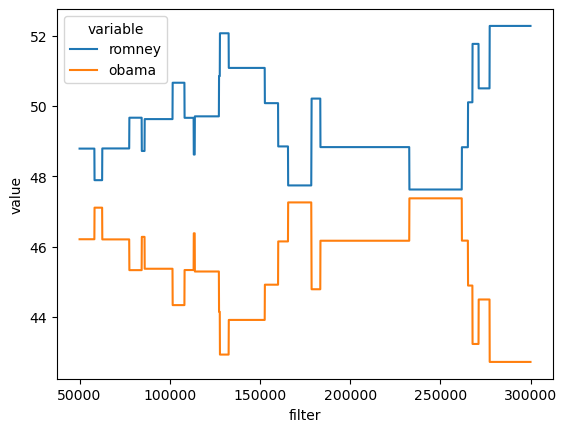

In [16]:
prediction_data = pd.read_csv('../campaign_csvs/election_prediction.csv')

election_2012 = duckdb.sql("""SELECT state, evotes, Obama_2012, Romney_2012, Obama_2012-Romney_2012 AS diff_2012 FROM prediction_data
                           WHERE Obama_2012 > 0 AND Romney_2012 > 0""").df()

data_binary = pd.read_csv('../campaign_csvs/people_visited_comparison.csv')

data_binary = duckdb.sql("""SELECT *, visits_A - visits_B AS diff FROM data_binary WHERE visits_A > 0 AND visits_B > 0""").df()

filter = []
obama = []
romney = [] 

for i in range(50000, 300000, 100):
    data_binary = data_binary[abs(data_binary['diff']) > i]

    model_binary = LogisticRegression().fit(Normalizer(data_binary['diff'].values.reshape(-1,1)), 
                                        data_binary['A_won'].values.reshape(-1,1))

    election_2012['evotes_2012'] = election_2012['evotes']*model_binary.predict_proba(Normalizer(election_2012['diff_2012'].values.reshape(-1,1)))[:,1]
    obama_votes = np.sum(election_2012['evotes_2012'])
    romney_votes = np.sum(election_2012['evotes'])-np.sum(election_2012['evotes_2012'])
    
    filter.append(i)
    obama.append(obama_votes)
    romney.append(romney_votes)

df = pd.DataFrame({'filter':filter,'romney':romney, 'obama':obama})
dfl = pd.melt(df, ['filter'])
print(df)
sns.lineplot(dfl, x='filter',y='value',hue='variable')